In [20]:
import math
import pandas as pd
import dtale
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

In [2]:
# makes pandas plotting interactive by default
pd.set_option("plotting.backend", "pandas_bokeh")

In [3]:
# read data into a python dataframe
df = pd.read_csv("BigmacPrice.csv", parse_dates=["date"])
df = df.set_index("date")

In [4]:
dtale_example = pd.read_csv("https://raw.githubusercontent.com/lux-org/lux-datasets/master/data/college.csv")

In [5]:
df.head()

,currency_code,name,local_price,dollar_ex,dollar_price
date,,,,,
2000-04-01,ARS,Argentina,2.50,1,2.50
2000-04-01,AUD,Australia,2.59,1,2.59
2000-04-01,BRL,Brazil,2.95,1,2.95
2000-04-01,GBP,Britain,1.90,1,1.90
2000-04-01,CAD,Canada,2.85,1,2.85


In [6]:
# interatively visualize lots of data with dtale
d = dtale.show(dtale_example)

In [7]:
d.open_browser()

In [8]:
# filter rows
df_CAD = df[df.currency_code == "CAD"]

In [9]:
# replace values in a column
df.loc[df.currency_code == "CAD", "dollar_ex"] = 0.7

In [10]:
df[df.currency_code == "CAD"]

,currency_code,name,local_price,dollar_ex,dollar_price
date,,,,,
2000-04-01,CAD,Canada,2.85,0.7,2.85
2001-04-01,CAD,Canada,3.33,0.7,3.33
2002-04-01,CAD,Canada,3.33,0.7,3.33
2003-04-01,CAD,Canada,3.20,0.7,3.20
2004-05-01,CAD,Canada,3.19,0.7,3.19
2005-06-01,CAD,Canada,3.28,0.7,3.28
2006-01-01,CAD,Canada,3.52,0.7,3.52
2006-05-01,CAD,Canada,3.52,0.7,3.52
2007-01-01,CAD,Canada,3.63,0.7,3.63


In [11]:
df["dollar_price"] = (df["local_price"] * df["dollar_ex"]).round(2)

In [12]:
df[df.currency_code == "CAD"].plot()

Figure(id='1002', ...)

In [13]:
# filter columns
df_CAD = df_CAD[["currency_code", "dollar_price"]]

<AxesSubplot: xlabel='date'>

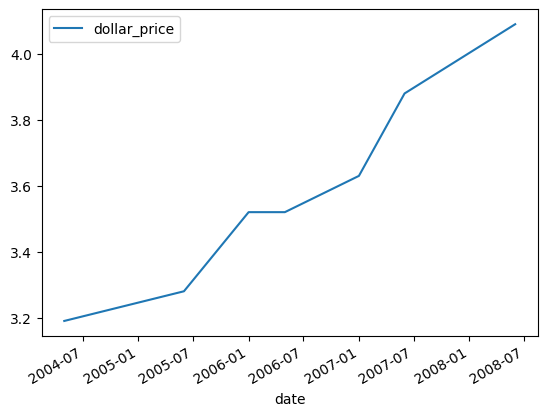

In [14]:
# filter by date
pd.set_option("plotting.backend", "matplotlib")
df_CAD["2004-04-01":"2008-08-01"].plot()

In [15]:
# https://pandas.pydata.org/docs/ecosystem.html
# https://janakiev.com/blog/jupyter-virtual-envs/

In [16]:
# Redesign the data to take one value per year
df = df_CAD.asfreq('A', method='bfill')

In [17]:
# Model and predict the annual price
mod = AutoReg(df["dollar_price"], 3, old_names=False)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:           dollar_price   No. Observations:                   22
Model:                     AutoReg(3)   Log Likelihood                   1.482
Method:               Conditional MLE   S.D. of innovations              0.224
Date:                Wed, 07 Dec 2022   AIC                              7.036
Time:                        23:16:15   BIC                             11.758
Sample:                    12-31-2003   HQIC                             7.835
                         - 12-31-2021                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2983      0.207      1.444      0.149      -0.107       0.703
dollar_price.L1     0.8427      0.220      3.824      0.000       0.411       1.275
dollar_price.L2     0.2395      

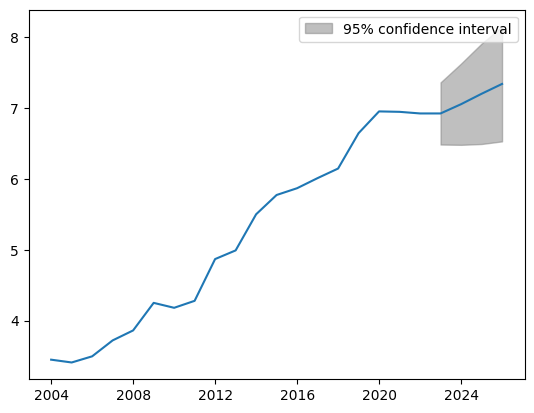

In [18]:
fig = res.plot_predict(0,25)

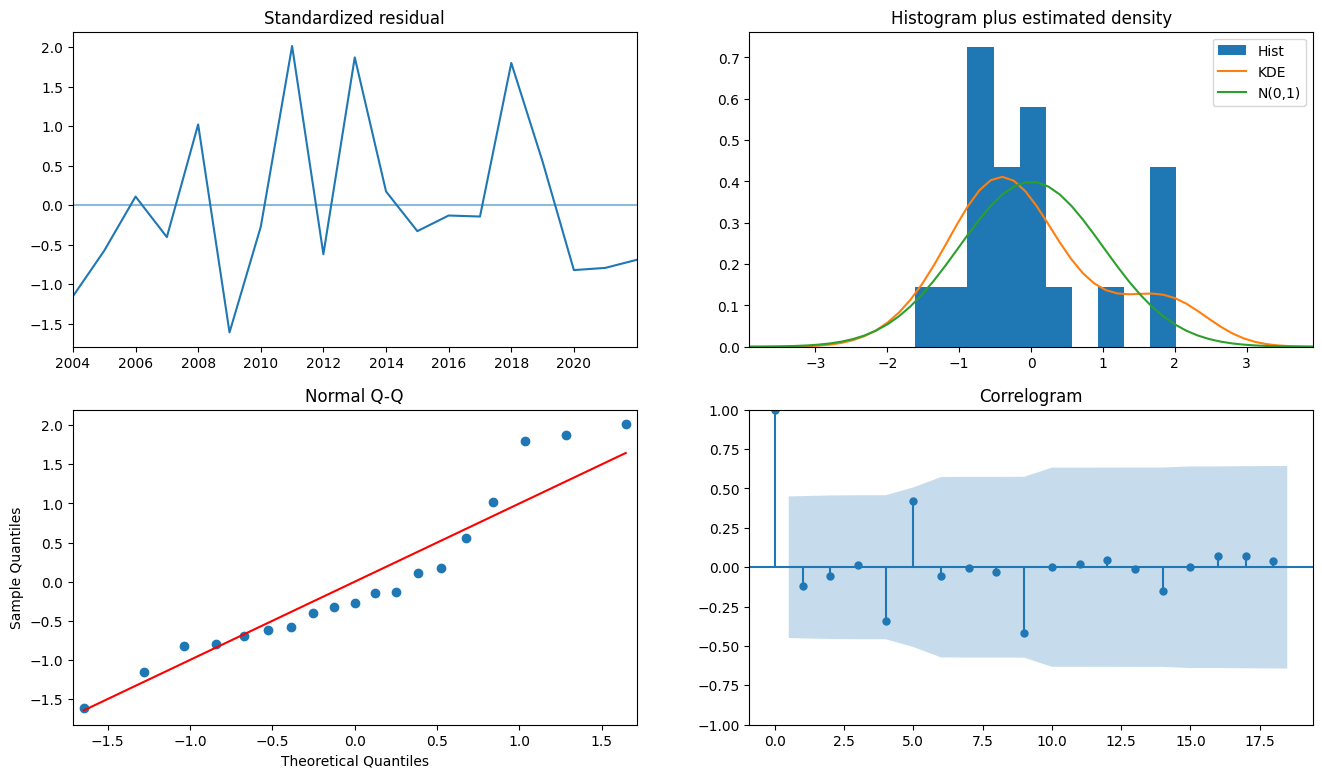

In [21]:
# statistically test if the model was good or not
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(fig=fig, lags=18)